<a href="https://colab.research.google.com/github/Ayush-Baranwal-X/Handwritten-Digit-Recognition/blob/master/Handwritten_Digit_Recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

In [ ]:
parser = 'auto'
mnistx = fetch_openml("mnist_784")
mnist = np.array(mnistx)

In [ ]:
x, y = np.array(mnistx["data"]), np.array(mnistx["target"])

In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
some_digit = x[3600]
some_digit_image = some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

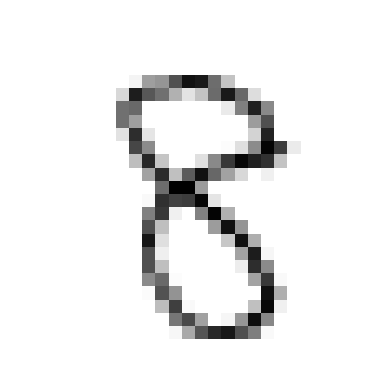

In [ ]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

In [ ]:
y[3600]

'8'

In [ ]:
mnistx["target"]

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, stratify = y)
x_train = x[:6000]
y_train = y[:6000]
x_test = x[6000:7000]
y_test = y[6000:7000]

In [ ]:
x_train.shape

(6000, 784)

In [ ]:
x_test.shape

(1000, 784)

In [ ]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

In [ ]:
y_train_2 = (y_train == 2)
y_train_2

array([False, False, False, ..., False, False, False])

In [ ]:
y_test_2 = (y_test == 2)
y_test_2

array([False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(tol = 0.1, solver="lbfgs", max_iter = 5000)
model.fit(x_train,y_train_2)

# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier(n_neighbors = 5)
# model.fit(x_train,y_train_2)

LogisticRegression(max_iter=5000, tol=0.1)

In [ ]:
model.predict([some_digit])

array([False])

In [ ]:
from sklearn.metrics import accuracy_score
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train_2,x_train_prediction)
print("Accuracy on Training Data : ", training_data_accuracy)

Accuracy on Training Data :  1.0


In [ ]:
# Accuracy on Test data
x_test_prediction = model.predict(x_test)
testing_data_accuracy= accuracy_score(y_test_2, x_test_prediction)
print("Accuracy on Testing Data : ", testing_data_accuracy)

Accuracy on Testing Data :  0.96


In [ ]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(model,x_train,y_train_2,cv = 3, scoring="accuracy")

In [ ]:
a.mean()

0.9538333333333333

In [ ]:
from joblib import dump
dump(model,"/content/drive/MyDrive/Colab Notebooks/Handwritten_Digit_Recognization/Recognizer.joblib")

['/content/drive/MyDrive/Colab Notebooks/Handwritten_Digit_Recognization/Recognizer.joblib']